##### Imports

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV

## Load Dataset

In [2]:
df = pd.read_csv("./predictive_maintenance.csv")
df.head()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB
None


## check statistics,check and handle missing values

In [3]:
df = df.drop(columns =['UDI', 'Product ID'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Target                   10000 non-null  int64  
 7   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(3), object(2)
memory usage: 625.1+ KB
None


In [4]:
df ['Air temperature [K]'] = df ['Air temperature [K]'] -273.15
df['Process temperature [K]'] = df['Process temperature [K]'] -273.15  

df = df.rename(columns ={ 'Air temperature [K]' : 'Air temperature [C]',
                         'Process temperature [K]' : 'Process temperature [C]'})



In [5]:
print(df.describe())

       Air temperature [C]  Process temperature [C]  Rotational speed [rpm]  \
count         10000.000000             10000.000000            10000.000000   
mean             26.854930                36.855560             1538.776100   
std               2.000259                 1.483734              179.284096   
min              22.150000                32.550000             1168.000000   
25%              25.150000                35.650000             1423.000000   
50%              26.950000                36.950000             1503.000000   
75%              28.350000                37.950000             1612.000000   
max              31.350000                40.650000             2886.000000   

        Torque [Nm]  Tool wear [min]        Target  
count  10000.000000     10000.000000  10000.000000  
mean      39.986910       107.951000      0.033900  
std        9.968934        63.654147      0.180981  
min        3.800000         0.000000      0.000000  
25%       33.200000    

In [6]:
df['Diff temperatre [C]'] = df ['Process temperature [C]'] - df['Air temperature [C]' ]


df.describe().style.background_gradient(cmap= "magma")


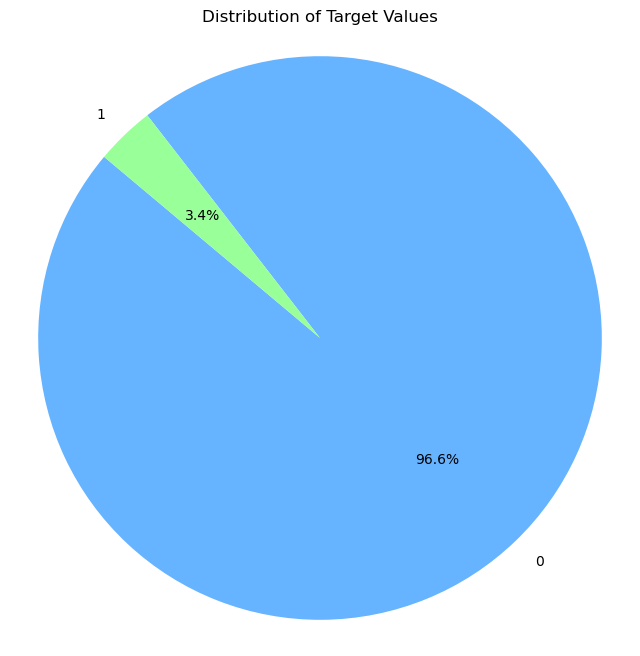

Text(0.5, 0.01, 'Number of 0s: 9661, Number of 1s: 339')

<Figure size 640x480 with 0 Axes>

In [7]:
# Count the occurrences of each value in the 'Target' column
target_counts = df['Target'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99'])
plt.title('Distribution of Target Values')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Display the counts below the pie chart
plt.figtext(0.5, 0.01, f'Number of 0s: {target_counts[0]}, Number of 1s: {target_counts[1]}', ha='center', fontsize=12)

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64


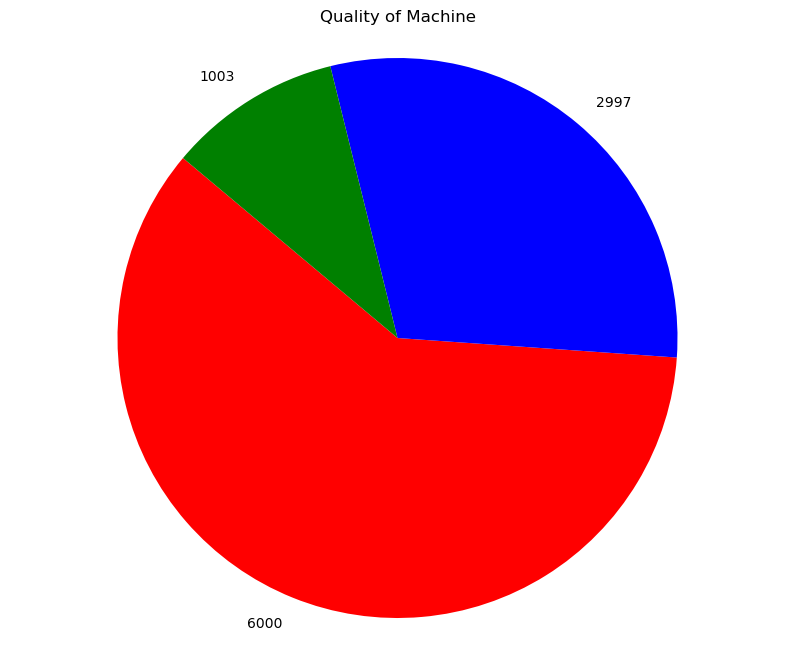

In [8]:
type_counts = df['Type'].value_counts()
print(type_counts)

plt.figure(figsize =( 10,8))
plt.pie(type_counts,labels= type_counts,startangle=140, colors=['red','blue','green'])
plt.title("Quality of Machine")
plt.axis('equal')
plt.show()

<Axes: xlabel='Target', ylabel='count'>

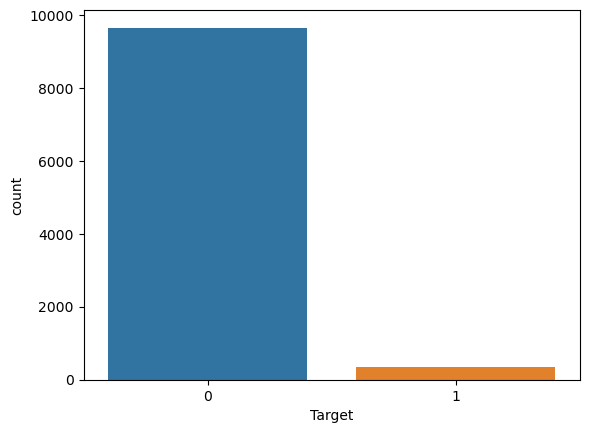

In [9]:
sns.countplot(x='Target', data =df)

[Text(0, 0, '9652'),
 Text(0, 0, '95'),
 Text(0, 0, '45'),
 Text(0, 0, '78'),
 Text(0, 0, '18'),
 Text(0, 0, '112')]

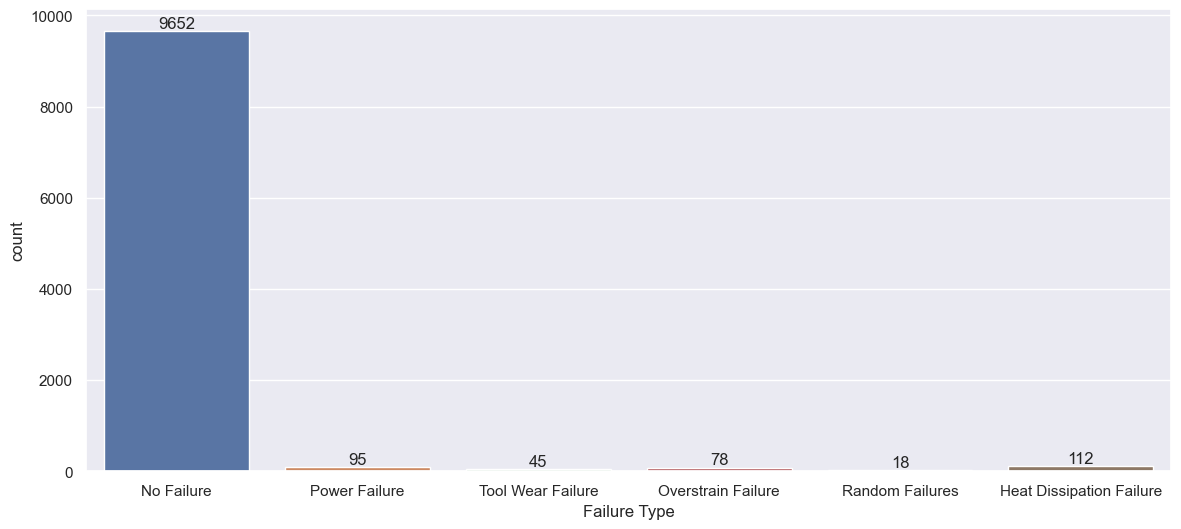

In [10]:
sns.set(rc = {"figure.figsize": (14,6)})
ax = sns.countplot(x="Failure Type", data =df)
ax.bar_label(ax.containers[0])

<Axes: xlabel='Type', ylabel='count'>

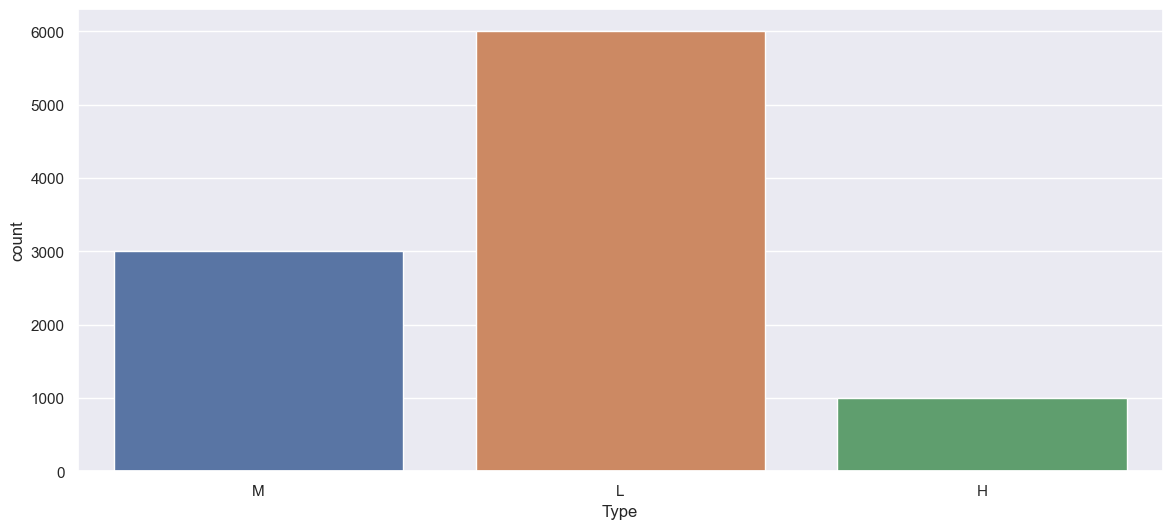

In [11]:
sns.countplot(x='Type', data=df)

In [12]:
import pandas as pd

# Drop the "Failure Type" column
df_cleaned = df.drop(columns=["Failure Type"])

# Select only numeric columns
numeric_cols = df_cleaned.select_dtypes(include='number').columns

# Group by 'Type' and calculate the mean for numeric columns
result = df_cleaned.groupby('Type')[numeric_cols].mean()

print(result)


      Air temperature [C]  Process temperature [C]  Rotational speed [rpm]  \
Type                                                                         
H               26.716999                36.775723             1538.147557   
L               26.865833                36.862300             1539.469167   
M               26.879263                36.868785             1537.598932   

      Torque [Nm]  Tool wear [min]    Target  Diff temperatre [C]  
Type                                                               
H       39.838285       107.419741  0.020937            10.058724  
L       39.996600       108.378833  0.039167             9.996467  
M       40.017251       107.272272  0.027694             9.989523  


In [13]:
# encoder = OneHotEncoder()
# transformed = encoder.fit_transform(df[['Failure Type']])
# # Create a dataframe of the hot encoded column
# df[encoder.categories_[0]] = transformed.toarray()
mapping = {"L":0, "M": 1, "H":2}
df['Type'] = df["Type"].map(mapping)

df = df.drop(columns = ["Failure Type"])
df.head()

Type  Air temperature [C]  Process temperature [C]  Rotational speed [rpm]  \
0     1                24.95                    35.45                    1551   
1     0                25.05                    35.55                    1408   
2     0                24.95                    35.35                    1498   
3     0                25.05                    35.45                    1433   
4     0                25.05                    35.55                    1408   

   Torque [Nm]  Tool wear [min]  Target  Diff temperatre [C]  
0         42.8                0       0                 10.5  
1         46.3                3       0                 10.5  
2         49.4                5       0                 10.4  
3         39.5                7       0                 10.4  
4         40.0                9       0                 10.5

<function matplotlib.pyplot.show(close=None, block=None)>

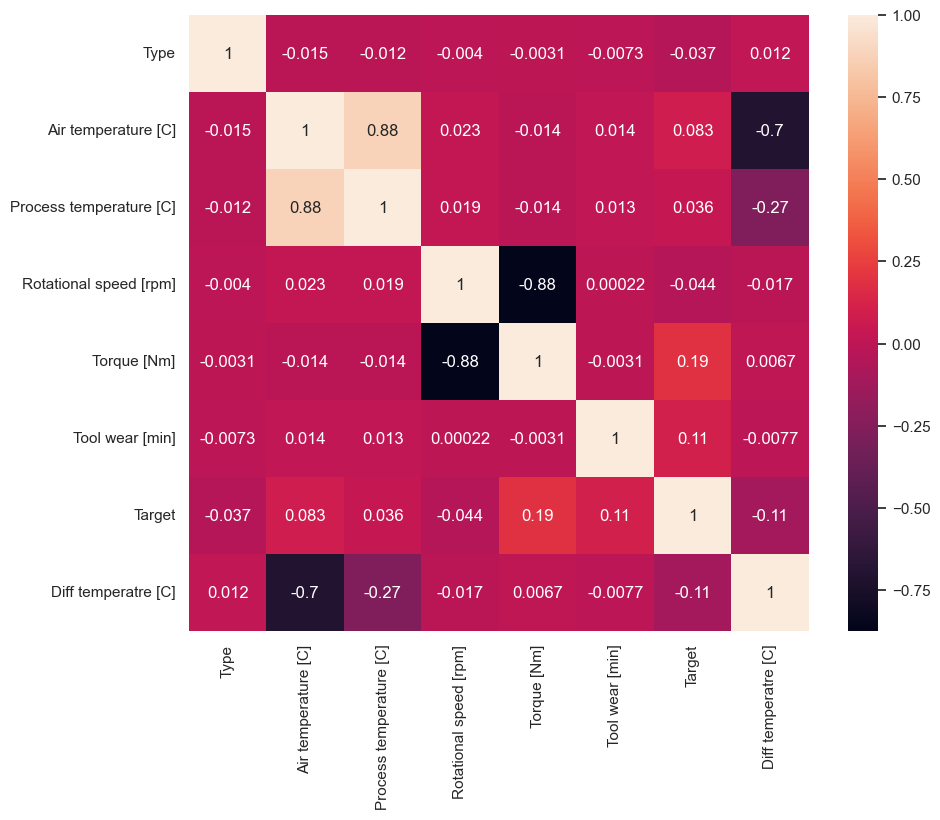

In [14]:
plt.figure(figsize=(10,8))
matrix = df.corr()
sns.heatmap(matrix, annot = True)
plt.show

In [15]:
upper_correlation = matrix.where(np.triu(np.ones(matrix.shape), k=1).astype(bool))
highly_correlated_features = [col for col in upper_correlation.columns if any(upper_correlation[col] > 0.8)]
print(highly_correlated_features)

['Process temperature [C]']


In [16]:
df = df.drop(highly_correlated_features, axis =1)

In [17]:
df.isnull().sum()

Type                      0
Air temperature [C]       0
Rotational speed [rpm]    0
Torque [Nm]               0
Tool wear [min]           0
Target                    0
Diff temperatre [C]       0
dtype: int64

In [25]:
df.columns= ['type', 'air_temp', 'rot_speed', 'torque', 'tool_wear', 'target', 'diff_temp']
X = df.drop(columns = ['target'])
y = df.target
X.shape, y.shape
X_train, X_test, y_train,y_test = train_test_split(X, y, stratify=y, test_size=0.2)
print(y_train.value_counts()*100/len(y_train)), print(y_test.value_counts()*100/len(y_test))

target
0    96.6125
1     3.3875
Name: count, dtype: float64
target
0    96.6
1     3.4
Name: count, dtype: float64


(None, None)

In [28]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, precision_recall_curve
xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

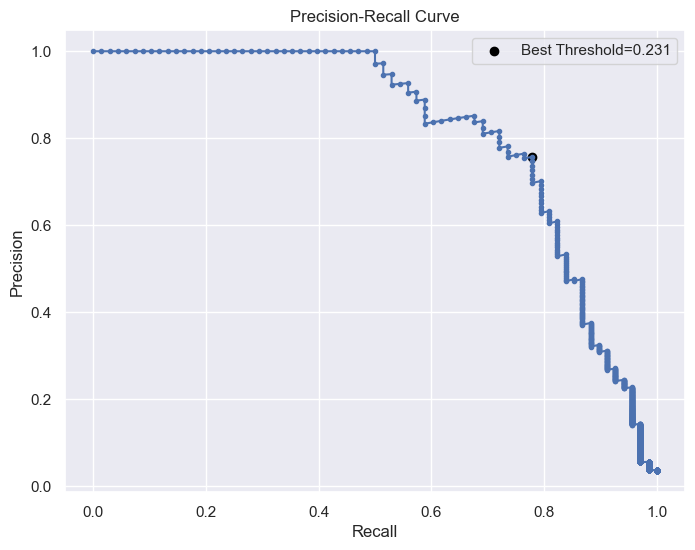

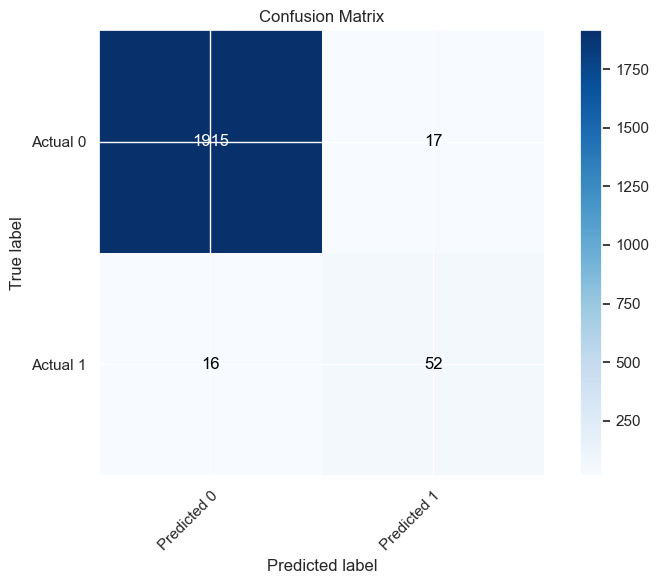

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, confusion_matrix, f1_score, make_scorer, roc_auc_score
def evaluate_model(X_test, y_test, model):
    y_prob = model.predict_proba(X_test)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
    with np.errstate(divide='ignore', invalid='ignore'):
        f_score = (2 * precision * recall) / (precision + recall)
        f_score[np.isnan(f_score)] = 0  # Replace NaN with 0
    
    ix_max_f = np.argmax(f_score)
    
    # Find the best threshold based on F-score
    best_threshold = thresholds[ix_max_f]
    best_precision = precision[ix_max_f]
    best_recall = recall[ix_max_f]
    
    # Plot precision-recall curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='.')
    plt.scatter(best_recall, best_precision, marker='o', color='black', label=f'Best Threshold={best_threshold:.3f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()
    
    # Plot confusion matrix
    y_pred = (y_prob > best_threshold).astype(int)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    ax = plt.subplot()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=['Predicted 0', 'Predicted 1'],
           yticklabels=['Actual 0', 'Actual 1'],
           title='Confusion Matrix',
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.show()
evaluate_model(X_test, y_test, xgb_model)

## Logistic Regression


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Fit the logistic regression model
lr_model = LogisticRegression()


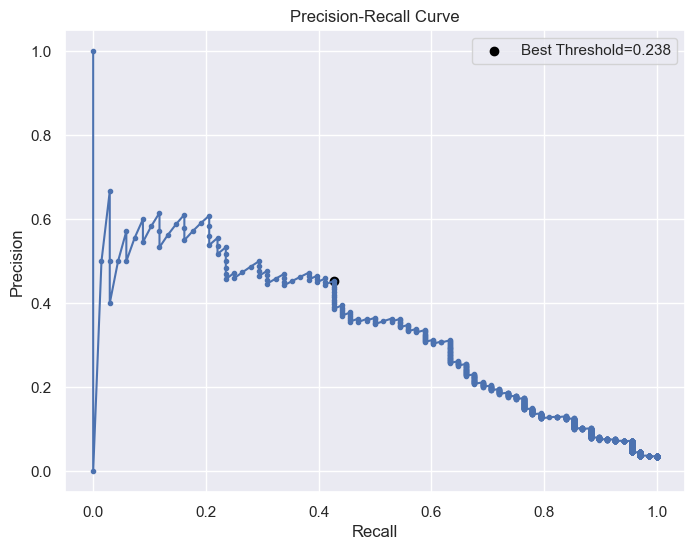

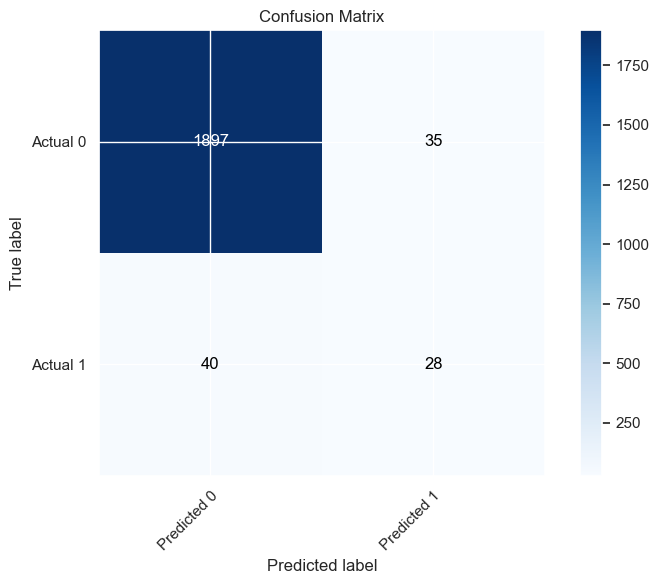

In [45]:
lr_model.fit(X_train, y_train)

# Evaluate the logistic regression model
evaluate_model(X_test, y_test, lr_model)

## Linear Discriminant Analysis

In [49]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

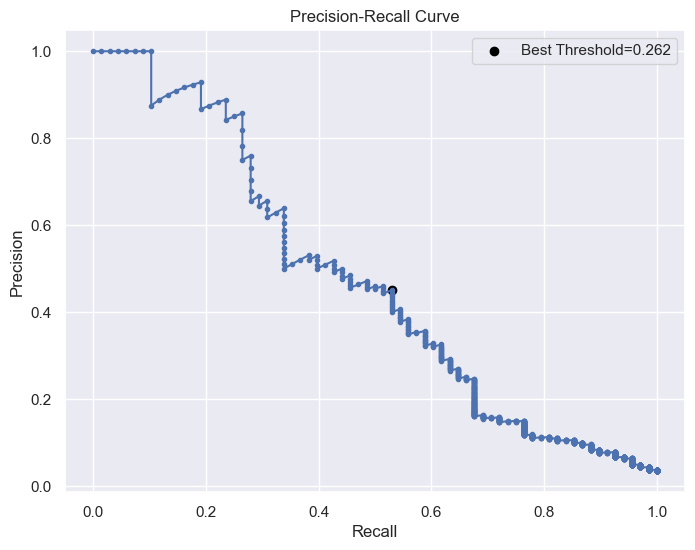

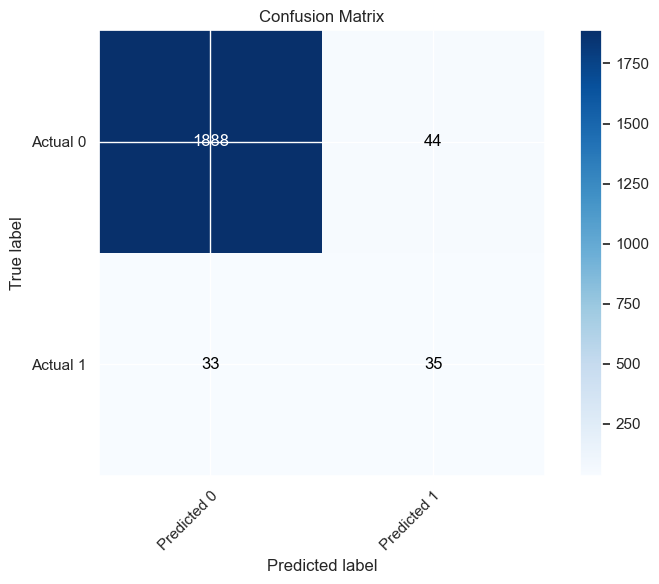

In [50]:
evaluate_model(X_test, y_test, lda_model)

## Random Forest Classifier


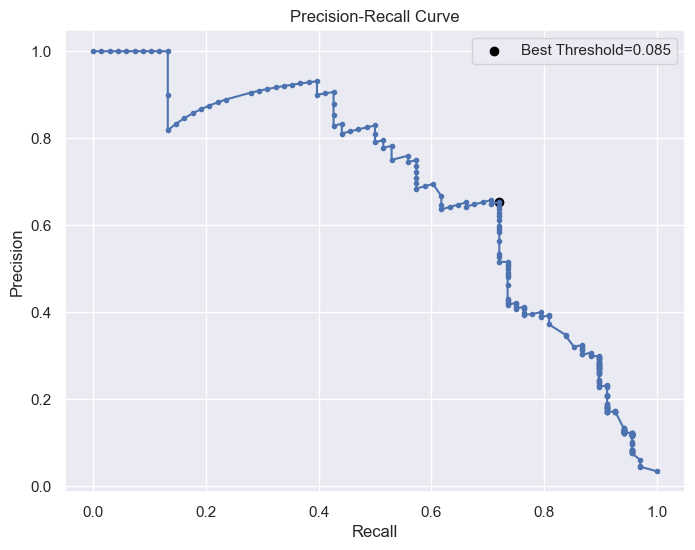

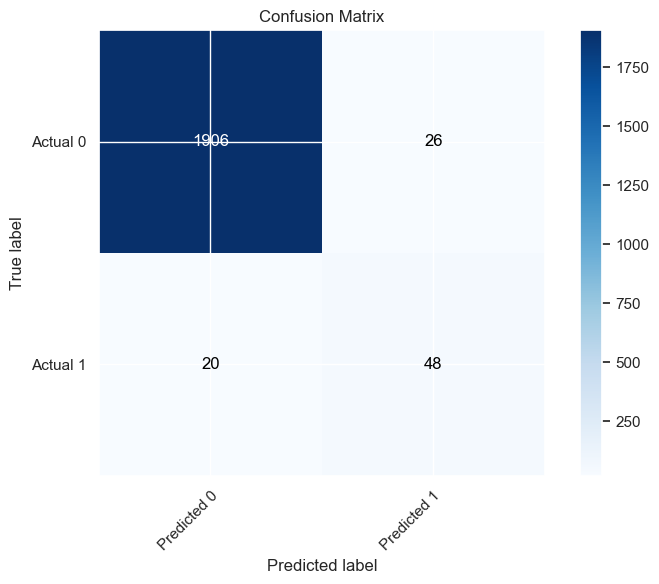

In [51]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(max_depth=2,
                                    random_state=0)
rfc_model.fit(X_train, y_train)
evaluate_model(X_test, y_test, rfc_model)

## Decision Tree

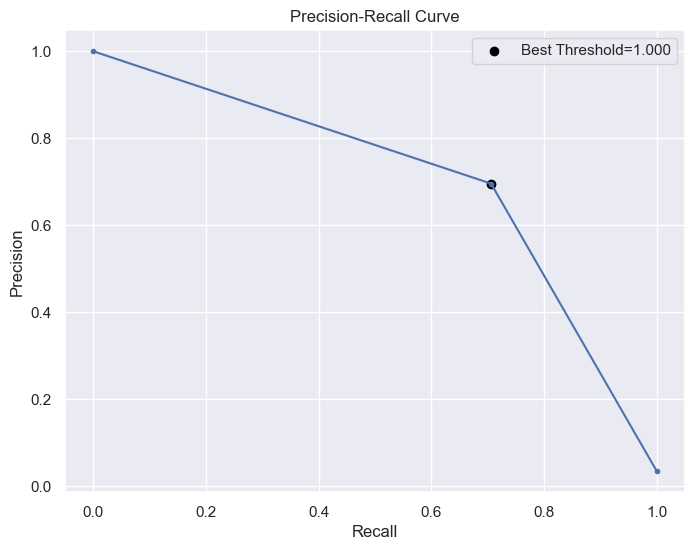

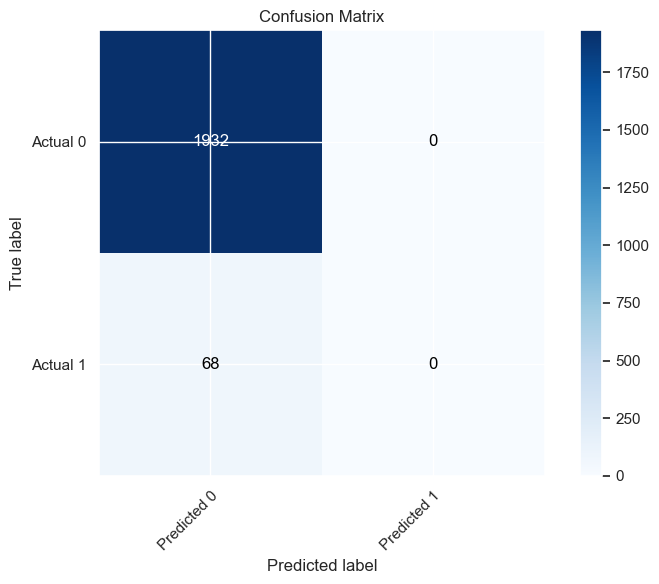

In [53]:
from sklearn.tree import DecisionTreeClassifier
gini_model = DecisionTreeClassifier(criterion="gini")
gini_model.fit(X_train, y_train)
evaluate_model(X_test, y_test, gini_model)

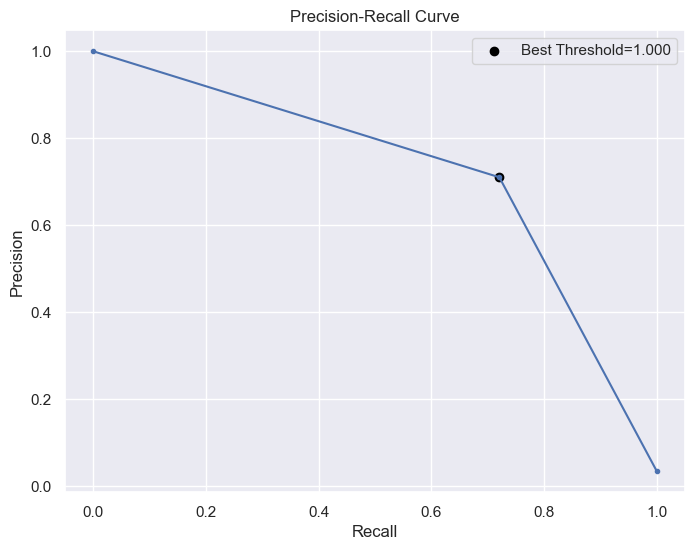

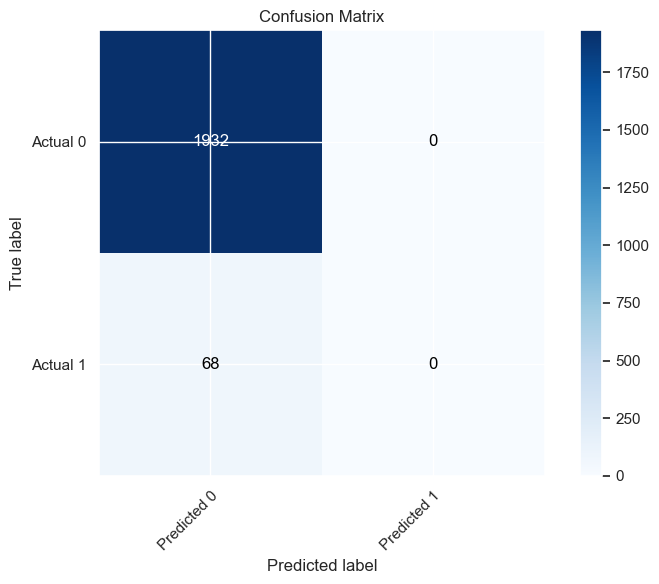

In [54]:
entropy_model = DecisionTreeClassifier(criterion="entropy")
entropy_model.fit(X_train, y_train)
evaluate_model(X_test, y_test, entropy_model)

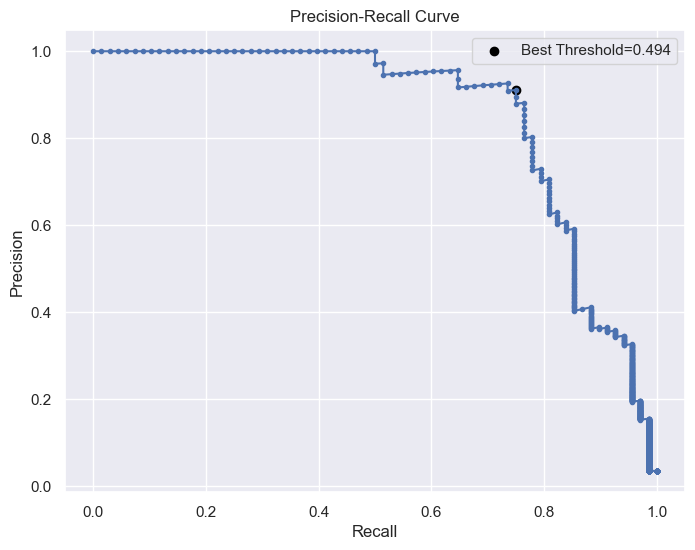

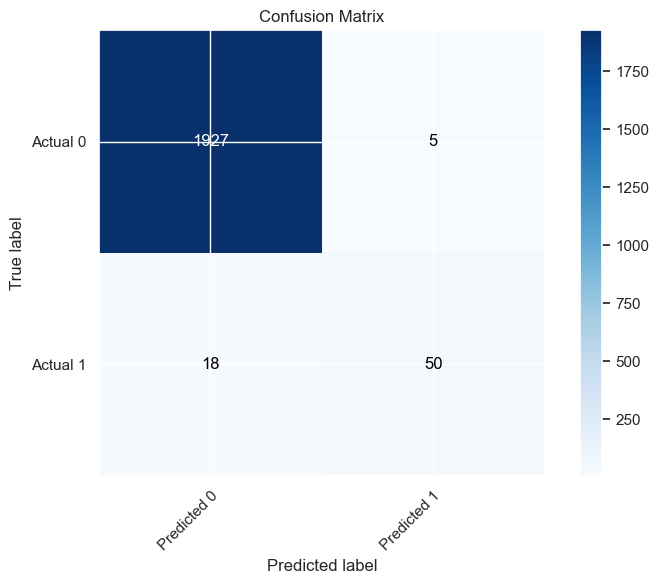

In [58]:
from catboost import CatBoostClassifier, Pool
cbc_model = CatBoostClassifier(
        loss_function='Logloss',
        eval_metric='AUC',
        learning_rate=0.05,
        iterations=5000,
        depth=9,
        random_strength=0,
        l2_leaf_reg=0.5,
        task_type='CPU',
        random_seed=42,
        verbose=False
    )
cbc_model.fit(X_train, y_train)
evaluate_model(X_test, y_test, cbc_model)

## Fine- Tuning

In [59]:
# Define the hyperparameters and their search ranges
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

In [63]:
# Create an XGBoost model
xgb_model = XGBClassifier()
# Perform GridSearchCV
f1 = make_scorer(f1_score , average='macro')
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring=f1)
grid_search.fit(X_train, y_train)
# Get the best hyperparameters
best_params = grid_search.best_params_
# Fit the model with the best hyperparameters on the entire dataset
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

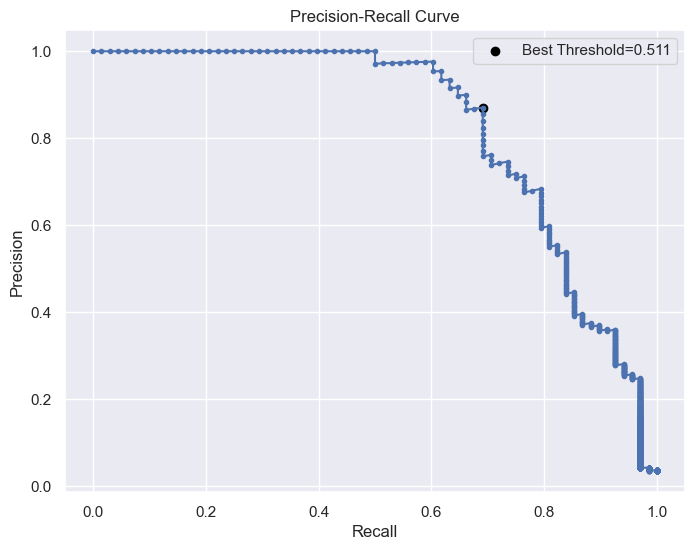

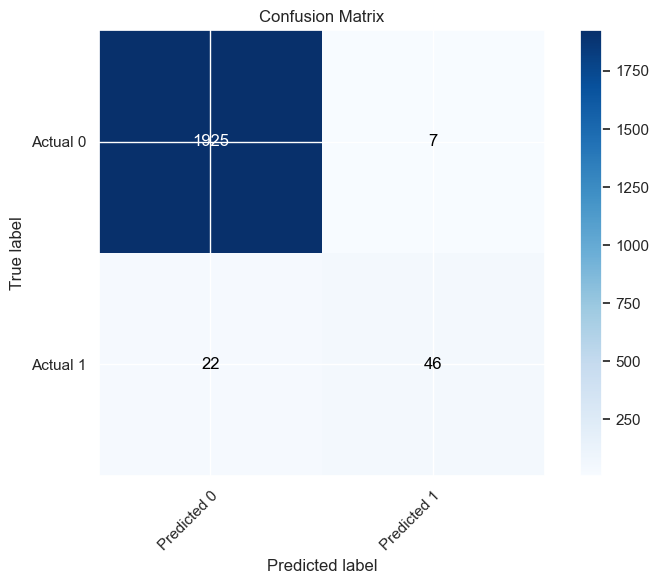

In [64]:
evaluate_model(X_test, y_test, best_model)

In [65]:
param_grid_rfc = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
}
# Create an RandomForest model
rfc_model = RandomForestClassifier()
# Perform GridSearchCV
f1 = make_scorer(f1_score , average='macro')
grid_search = GridSearchCV(rfc_model, param_grid_rfc, cv=5, scoring=f1)
grid_search.fit(X_train, y_train)
# Get the best hyperparameters
best_params = grid_search.best_params_
# Fit the model with the best hyperparameters on the entire dataset
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, max_features=None, max_leaf_nodes=9,
                       n_estimators=25)

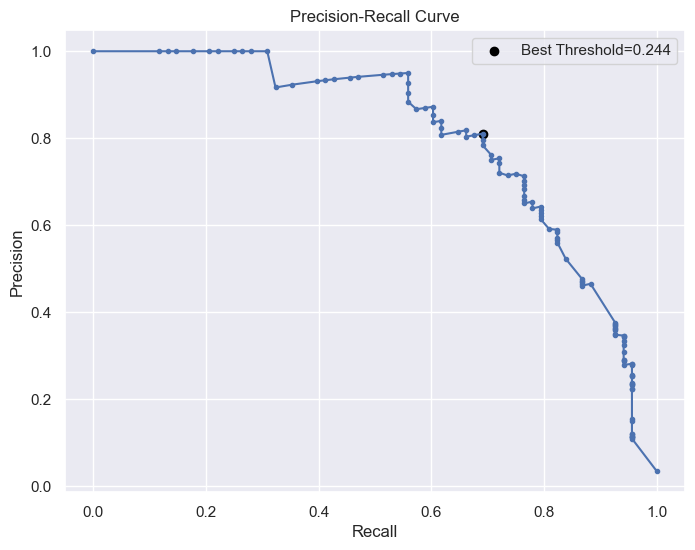

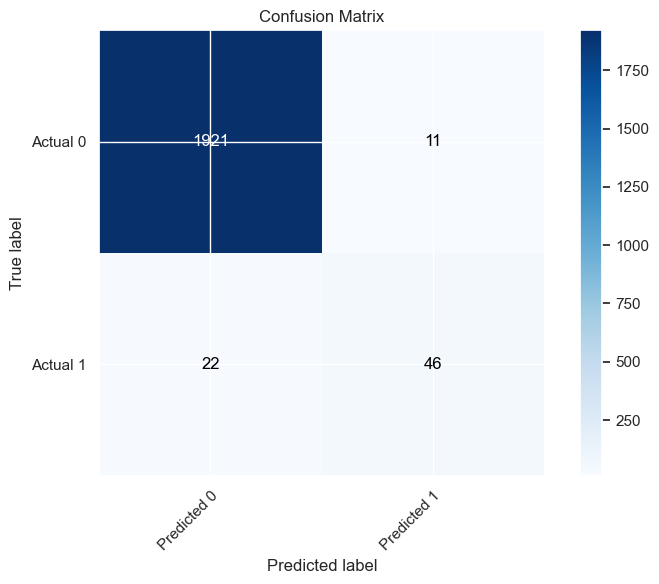

In [66]:
evaluate_model(X_test, y_test, best_model)

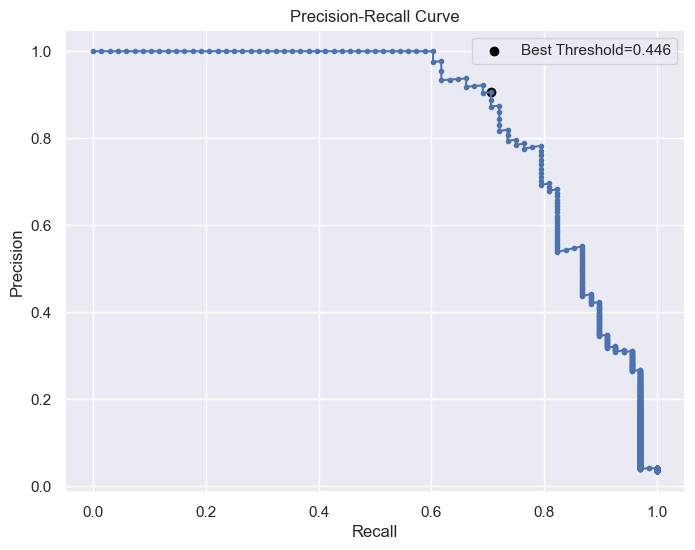

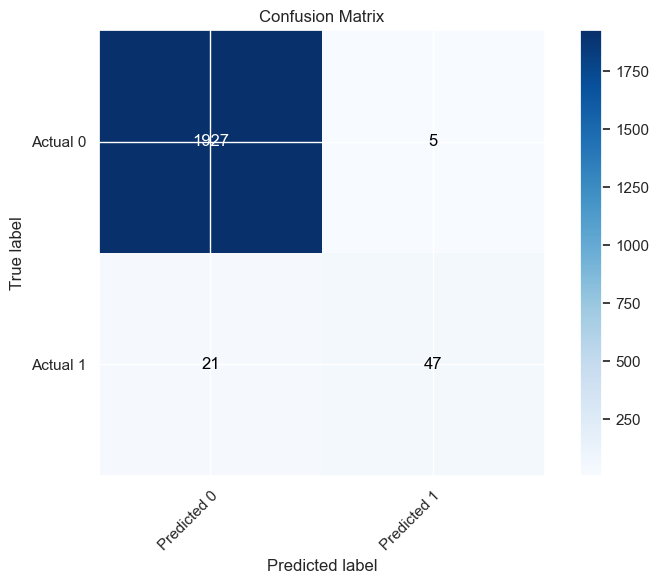

In [68]:
xgb_clf = XGBClassifier(
    n_estimators = 100,
    learning_rate = 0.1,
    max_depth = 4,
    min_child_weight = 1,
    colsample_bytree = 1,
    subsample = 0.8
)

xgb_clf.fit(X_train, y_train)
evaluate_model(X_test, y_test, xgb_clf)